In [7]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from learnEnron import ml_plots
from learnEnron import figures
from learnEnron import feature_format

%matplotlib inline

## Exploring the dataset

In [4]:
# A dictionary of the dataset
enron_data = pickle.load(open("final_project_dataset.pkl", "rb"))

# Remove TOTAL as this is not a person
# but a sum of all key values in the
# dict.
enron_data.pop("TOTAL", None)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [5]:
df = pd.DataFrame(enron_data)

# Best to have variables as columns.
df = df.transpose()

# NaN values not recognised.
df = df.replace('NaN', np.NaN)

# Create a new column based on index
# as this gives each persons name.
df['name'] = df.index

df.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,phillip.allen@enron.com,1729541.0,13868.0,2195.0,47.0,65.0,...,152.0,False,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0,ALLEN PHILLIP K
BADUM JAMES P,NaN,178980.0,NaN,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0,BADUM JAMES P
BANNANTINE JAMES M,NaN,NaN,-5104.0,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,864523.0,False,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0,BANNANTINE JAMES M
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,NaN,6680544.0,11200.0,NaN,NaN,NaN,...,2660303.0,False,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0,BAXTER JOHN C
BAY FRANKLIN R,400000.0,260455.0,-201641.0,NaN,frank.bay@enron.com,NaN,129142.0,NaN,NaN,NaN,...,69.0,False,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0,BAY FRANKLIN R


In [17]:
df.to_csv("resources/R/enron_data.csv")

In [4]:
df.shape

(145, 22)

In [5]:
# How many persons of interest are there within the dataset.
df[df['poi'] == True]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,108.0,...,NaN,210698.0,True,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,15.0,...,974293.0,1621.0,True,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,25.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,12.0,...,350000.0,307895.0,True,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0
COLWELL WESLEY,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,11.0,...,NaN,101740.0,True,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,609.0,...,1294981.0,1661.0,True,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
FASTOW ANDREW S,1300000.0,NaN,-1386055.0,NaN,andrew.fastow@enron.com,NaN,55921.0,NaN,NaN,NaN,...,1736055.0,277464.0,True,1794412.0,NaN,440698.0,NaN,NaN,2424083.0,1794412.0
GLISAN JR BEN F,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,6.0,...,71023.0,200308.0,True,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0
HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,21.0,...,1617011.0,11350.0,True,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
HIRKO JOSEPH,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,NaN,...,NaN,2856.0,True,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0


In [6]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.100000e+01,3.800000e+01,4.800000e+01,16.000000,1.010000e+02,94.000000,86.000000,86.000000,86.000000,3.000000e+00,6.500000e+01,9.200000e+01,1.090000e+02,1.700000e+01,9.400000e+01,86.000000,86.000000,1.240000e+02,1.250000e+02
mean,1.201773e+06,8.416025e+05,-5.810498e+05,89822.875000,2.959559e+06,54192.010638,608.790698,64.895349,41.232558,2.797500e+07,7.464912e+05,4.652767e+05,1.147424e+06,6.218928e+05,2.840875e+05,1176.465116,2073.860465,2.623421e+06,3.352073e+06
std,1.441679e+06,1.289323e+06,9.420764e+05,41112.700735,5.499450e+06,46108.377454,1841.033949,86.979244,100.073111,4.638256e+07,8.629174e+05,1.389719e+06,2.249770e+06,3.845528e+06,1.771311e+05,1178.317641,2582.700981,9.488106e+06,6.532883e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-1.787380e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.250000e+05,7.964450e+04,-6.112092e+05,83674.500000,5.067650e+05,22479.000000,22.750000,10.000000,1.000000,1.200000e+06,2.750000e+05,1.209000e+03,2.520550e+05,-3.298250e+05,2.118020e+05,249.750000,541.250000,3.863802e+05,4.941360e+05
50%,7.500000e+05,2.210635e+05,-1.519270e+05,106164.500000,1.297049e+06,46547.500000,41.000000,35.000000,8.000000,2.000000e+06,4.221580e+05,5.198450e+04,4.410960e+05,-1.402640e+05,2.587410e+05,740.500000,1211.000000,1.100246e+06,1.095040e+06
75%,1.200000e+06,8.672112e+05,-3.792600e+04,112815.000000,2.542813e+06,78408.500000,145.500000,72.250000,24.750000,4.176250e+07,8.318090e+05,3.575772e+05,9.850320e+05,-7.241900e+04,3.086065e+05,1888.250000,2634.750000,2.084663e+06,2.606763e+06
max,8.000000e+06,6.426990e+06,-8.330000e+02,137864.000000,3.434838e+07,228763.000000,14368.000000,528.000000,609.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,1.545629e+07,1.111258e+06,5521.000000,15149.000000,1.035598e+08,4.911008e+07


In [7]:
# Get a persons variable value.
enron_data["PRENTICE JAMES"]["total_stock_value"]

1095040

In [8]:
enron_data["COLWELL WESLEY"]["from_this_person_to_poi"]

11

In [9]:
# Look into the POI text file for all persons of interest.
df2 = pd.read_csv('poi_names.txt', 
                  delim_whitespace=True, 
                  names=['POI', 'Last_name', 'First_name']
                 )
print(df2.shape)
df2.head()

(35, 3)


,POI,Last_name,First_name
0,(y),"Lay,",Kenneth
1,(y),"Skilling,",Jeffrey
2,(n),"Howard,",Kevin
3,(n),"Krautz,",Michael
4,(n),"Yeager,",Scott


In [10]:
# Who got the most money?
print(enron_data["LAY KENNETH L"]["total_payments"])
print(enron_data["FASTOW ANDREW S"]["total_payments"])
print(enron_data["SKILLING JEFFREY K"]["total_payments"])

103559793
2424083
8682716


In [11]:
# Count all null values
df.isnull().sum()

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
email_address                 35
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64

In [37]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.100000e+01,3.800000e+01,4.800000e+01,16.000000,1.010000e+02,94.000000,86.000000,86.000000,86.000000,3.000000e+00,6.500000e+01,9.200000e+01,1.090000e+02,1.700000e+01,9.400000e+01,86.000000,86.000000,1.240000e+02,1.250000e+02
mean,1.201773e+06,8.416025e+05,-5.810498e+05,89822.875000,2.959559e+06,54192.010638,608.790698,64.895349,41.232558,2.797500e+07,7.464912e+05,4.652767e+05,1.147424e+06,6.218928e+05,2.840875e+05,1176.465116,2073.860465,2.623421e+06,3.352073e+06
std,1.441679e+06,1.289323e+06,9.420764e+05,41112.700735,5.499450e+06,46108.377454,1841.033949,86.979244,100.073111,4.638256e+07,8.629174e+05,1.389719e+06,2.249770e+06,3.845528e+06,1.771311e+05,1178.317641,2582.700981,9.488106e+06,6.532883e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-1.787380e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.250000e+05,7.964450e+04,-6.112092e+05,83674.500000,5.067650e+05,22479.000000,22.750000,10.000000,1.000000,1.200000e+06,2.750000e+05,1.209000e+03,2.520550e+05,-3.298250e+05,2.118020e+05,249.750000,541.250000,3.863802e+05,4.941360e+05
50%,7.500000e+05,2.210635e+05,-1.519270e+05,106164.500000,1.297049e+06,46547.500000,41.000000,35.000000,8.000000,2.000000e+06,4.221580e+05,5.198450e+04,4.410960e+05,-1.402640e+05,2.587410e+05,740.500000,1211.000000,1.100246e+06,1.095040e+06
75%,1.200000e+06,8.672112e+05,-3.792600e+04,112815.000000,2.542813e+06,78408.500000,145.500000,72.250000,24.750000,4.176250e+07,8.318090e+05,3.575772e+05,9.850320e+05,-7.241900e+04,3.086065e+05,1888.250000,2634.750000,2.084663e+06,2.606763e+06
max,8.000000e+06,6.426990e+06,-8.330000e+02,137864.000000,3.434838e+07,228763.000000,14368.000000,528.000000,609.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.476169e+07,1.545629e+07,1.111258e+06,5521.000000,15149.000000,1.035598e+08,4.911008e+07


In [13]:
# Only POIs.
df[df["poi"] == True].describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,1.600000e+01,5.000000e+00,1.100000e+01,0.0,1.200000e+01,18.000000,14.000000,14.000000,14.000000,1.0,1.200000e+01,1.800000e+01,1.700000e+01,0.0,1.700000e+01,14.000000,14.000000,1.800000e+01,1.800000e+01
mean,2.075000e+06,5.198942e+05,-1.035313e+06,NaN,1.046379e+07,59873.833333,300.357143,97.785714,66.714286,81525000.0,1.204862e+06,8.029974e+05,2.318621e+06,NaN,3.834449e+05,1783.000000,2417.142857,7.913590e+06,9.165671e+06
std,2.047437e+06,9.128895e+05,1.334972e+06,NaN,1.238259e+07,37524.658812,805.844574,76.058862,158.289622,NaN,9.916583e+05,2.417568e+06,3.620811e+06,NaN,2.783597e+05,1264.996625,1961.858101,2.396549e+07,1.384117e+07
min,2.000000e+05,1.025900e+04,-3.504386e+06,NaN,3.847280e+05,16514.000000,16.000000,13.000000,4.000000,81525000.0,7.102300e+04,4.860000e+02,1.260270e+05,NaN,1.584030e+05,91.000000,225.000000,9.109300e+04,1.260270e+05
25%,7.750000e+05,2.761000e+04,-1.860244e+06,NaN,1.456581e+06,31323.250000,33.000000,44.500000,12.500000,81525000.0,3.689780e+05,4.979500e+03,3.938180e+05,NaN,2.401890e+05,1059.250000,1115.750000,1.142396e+06,1.016450e+06
50%,1.275000e+06,2.029110e+05,-2.625000e+05,NaN,3.914557e+06,50448.500000,44.500000,62.000000,15.500000,81525000.0,1.134637e+06,1.492040e+05,9.850320e+05,NaN,2.786010e+05,1589.000000,1875.000000,1.754028e+06,2.206836e+06
75%,2.062500e+06,2.146780e+05,-1.220310e+05,NaN,1.938604e+07,84125.000000,101.500000,135.750000,28.750000,81525000.0,1.646772e+06,2.607725e+05,2.502063e+06,NaN,4.151890e+05,2165.250000,2969.250000,2.665345e+06,1.051133e+07
max,7.000000e+06,2.144013e+06,-8.330000e+02,NaN,3.434838e+07,127017.000000,3069.000000,240.000000,609.000000,81525000.0,3.600000e+06,1.035973e+07,1.476169e+07,NaN,1.111258e+06,5521.000000,7991.000000,1.035598e+08,4.911008e+07


In [14]:
# POIs with missing entries.
df[df["poi"] == True].isnull().sum()

bonus                         2
deferral_payments            13
deferred_income               7
director_fees                18
email_address                 0
exercised_stock_options       6
expenses                      0
from_messages                 4
from_poi_to_this_person       4
from_this_person_to_poi       4
loan_advances                17
long_term_incentive           6
other                         0
poi                           0
restricted_stock              1
restricted_stock_deferred    18
salary                        1
shared_receipt_with_poi       4
to_messages                   4
total_payments                0
total_stock_value             0
dtype: int64

### Regression mini-project

split 1: y=[ 2.10452164]x + 315564.34744564304
split 2: y=[ 1.94525797]x + 654599.7484512245


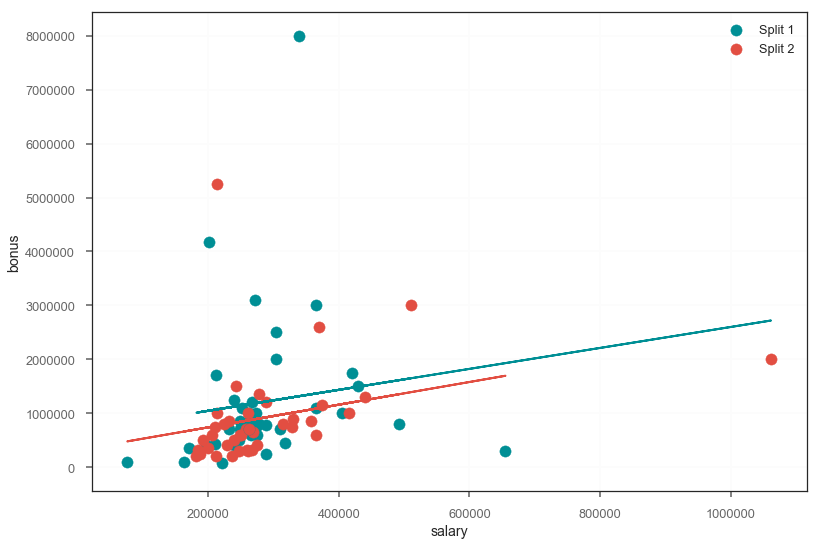

In [21]:
# Modified dictionary excludes some of the extreme values
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "rb") )

ml_plots.regression_plot(dictionary, "bonus", "salary")

split 1: y=[ 0.45297296]x + 3429923.318314989
split 2: y=[ 0.24406063]x + 1829709.5121529894


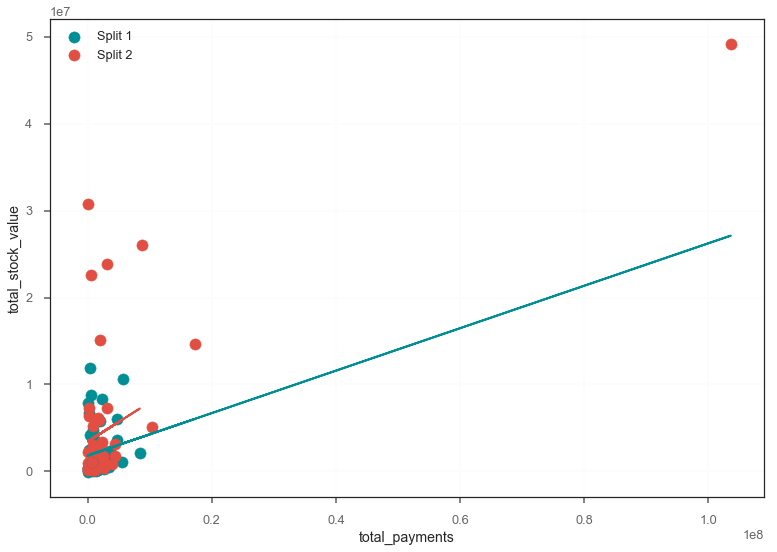

In [14]:
ml_plots.regression_plot(enron_data, "total_stock_value", "total_payments")

### Outliers mini-project

1: y=[[ 5.07793064]]x + [ 25.21002155]
0.878262470366


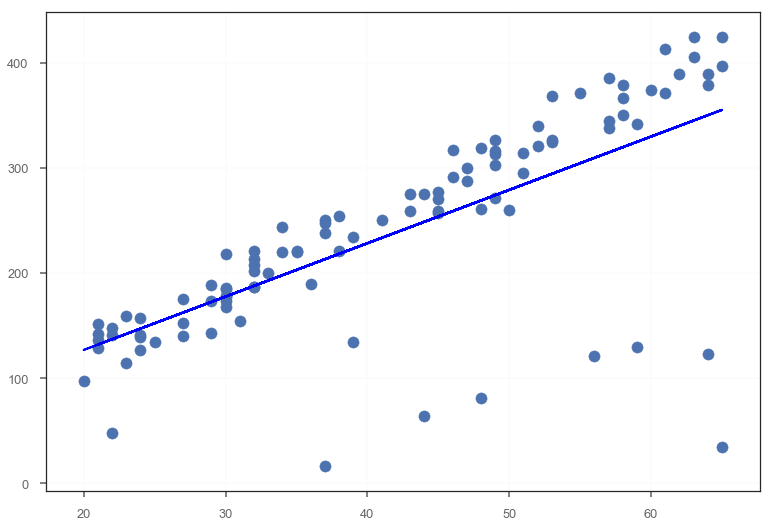

0.983189455396
2: y=[[ 6.36859481]]x + [-6.91861069]


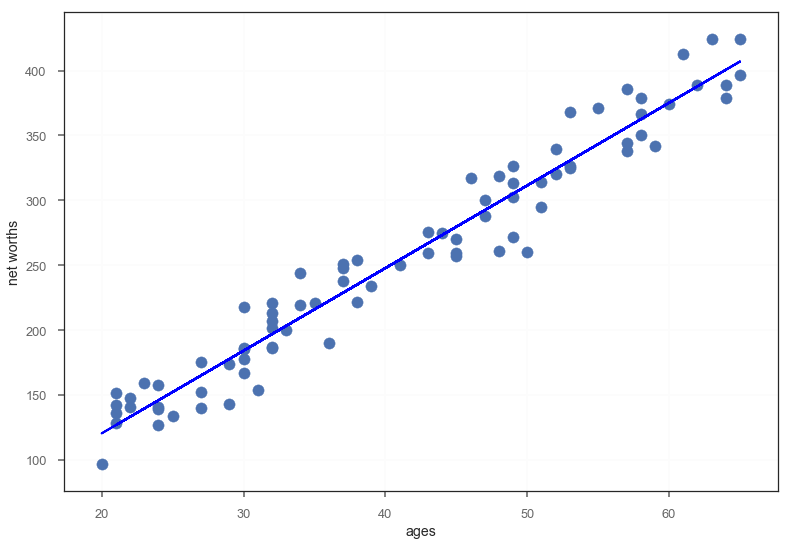

In [38]:
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

def outlierCleaner(predictions, ages, net_worths):
    """
        Clean away the 10% of points that have the largest
        residual errors (difference between the prediction
        and the actual net worth).

        Return a list of tuples named cleaned_data where 
        each tuple is of the form (age, net_worth, error).
    """
    
    cleaned_data = []

    diff = (net_worths-predictions)**2

    limit = numpy.percentile(numpy.absolute(diff), 90)

    cleaned_data = [
                    (age, net_worth, diff) 
                    for age, net_worth, diff 
                    in zip(ages, net_worths, diff) 
                    if abs(diff) <= limit
                    ]

    return cleaned_data

### load up some practice data with outliers in it
ages = pickle.load( open("practice_outliers_ages.pkl", "rb") )
net_worths = pickle.load( open("practice_outliers_net_worths.pkl", "rb") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

# Fit Regression
reg = LinearRegression()
reg.fit(ages_train, net_worths_train)

coefficient = reg.coef_
intercept = reg.intercept_
print("1: y={0}x + {1}"
      .format(coefficient,
              intercept)
      )
print(reg.score(ages_test, net_worths_test))

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

# Identify and remove the most outlier-y points.
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner(predictions, ages_train, net_worths_train)
except NameError:
    print("your regression object doesn't exist, or isn't name reg")
    print("can't make predictions to use in identifying outliers")







### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")
        
        print(reg.score(ages_test, net_worths_test))
        coefficient = reg.coef_
        intercept = reg.intercept_
        print("2: y={0}x + {1}"
              .format(coefficient,
                      intercept)
              )
    except NameError:
        print("you don't seem to have regression imported/created,")
        print("   or else your regression object isn't named reg")
        print("   either way, only draw the scatter plot of the cleaned data")
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print("outlierCleaner() is returning an empty list, no refitting to be done")


{'deferral_payments': 32083396, 'other': 42667589, 'email_address': 'NaN', 'exercised_stock_options': 311764000, 'from_messages': 'NaN', 'total_payments': 309886585, 'poi': False, 'total_stock_value': 434509511, 'long_term_incentive': 48521928, 'deferred_income': -27992891, 'restricted_stock_deferred': -7576788, 'bonus': 97343619, 'from_poi_to_this_person': 'NaN', 'restricted_stock': 130322299, 'loan_advances': 83925000, 'salary': 26704229, 'from_this_person_to_poi': 'NaN', 'director_fees': 1398517, 'shared_receipt_with_poi': 'NaN', 'to_messages': 'NaN', 'expenses': 5235198}


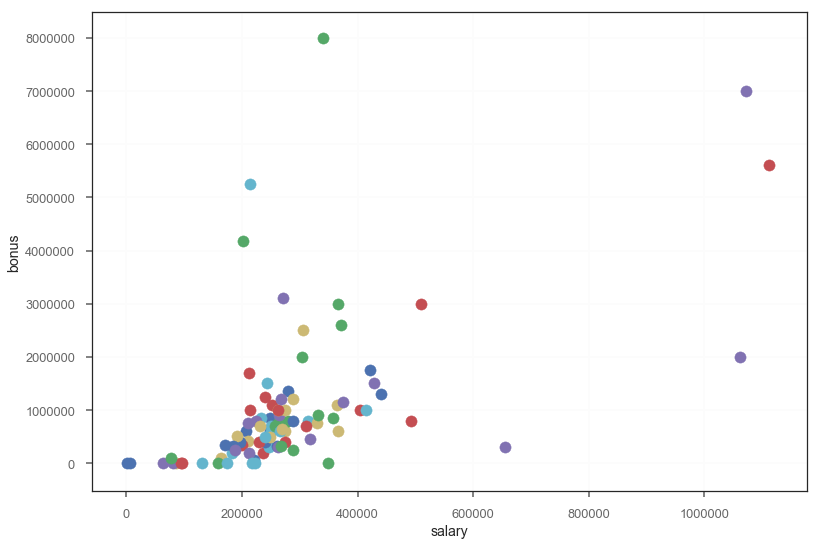

In [60]:
#!/usr/bin/python

import pickle
import matplotlib.pyplot as plt
from learnEnron.feature_format import featureFormat, targetFeatureSplit


# read in data dictionary, convert to numpy array
data_dict = enron_data

# Remove the total row as this is not a person
value = data_dict.pop("TOTAL", None)

features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

# Plot values
for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter(salary, bonus)

plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

In [19]:
df[df['salary'] > 1000000].index.tolist()

['FREVERT MARK A', 'LAY KENNETH L', 'SKILLING JEFFREY K']

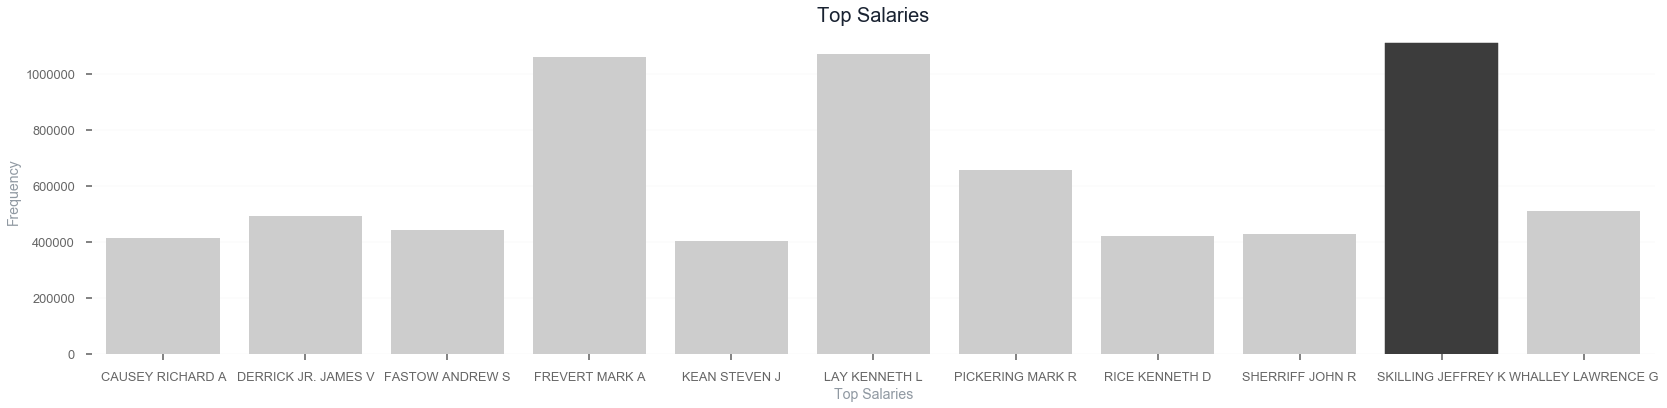

In [13]:
figures.bar(df[df['salary'] > 400000]['salary'],
            "Top Salaries", 
            x_v=df[df['salary'] > 400000]['name'],
            ax_size=(28, 6),
            highlight=9)

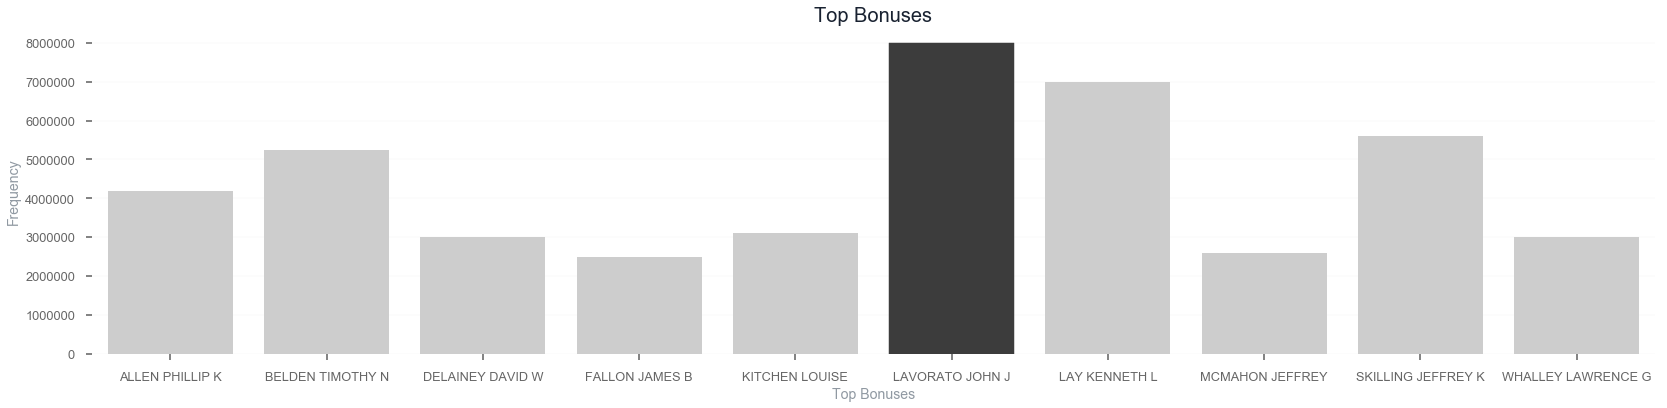

In [18]:
figures.bar(df[df['bonus'] > 2000000]['bonus'],
            "Top Bonuses", 
            x_v=df[df['bonus'] > 2000000]['name'],
            ax_size=(28, 6),
            highlight=5)

In [31]:
ax_size=(10, 10)

### K means clustering

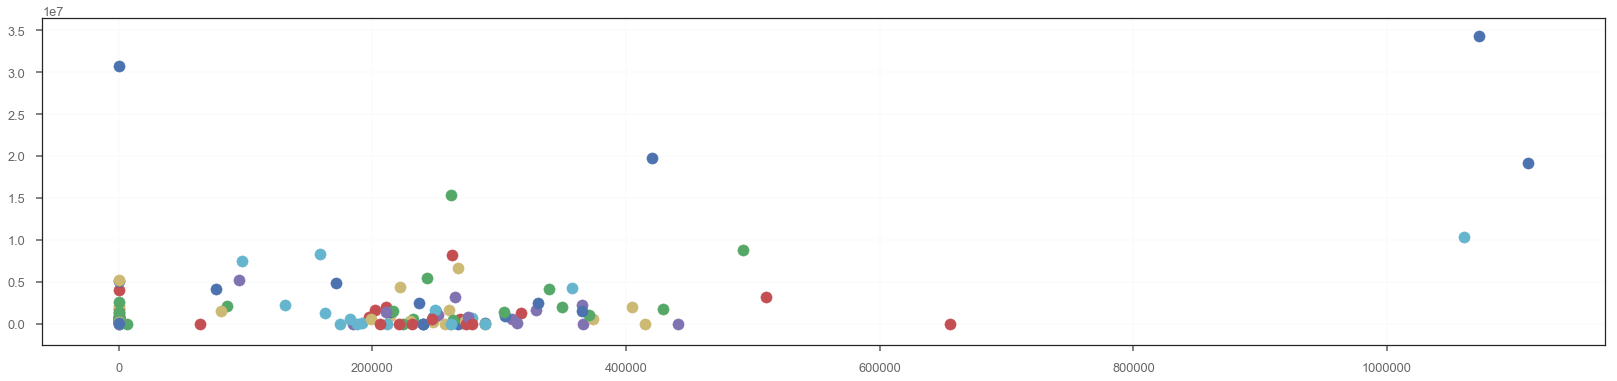

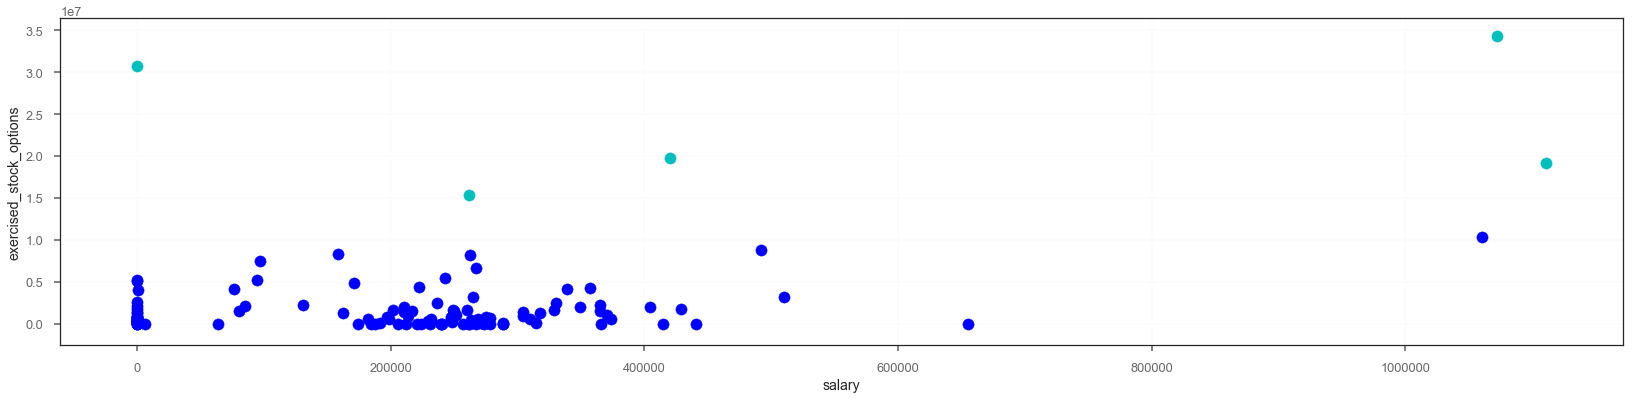

In [39]:
#!/usr/bin/python 

""" 
    Skeleton code for k-means clustering mini-project.
"""

import pickle
import numpy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from learnEnron.feature_format import featureFormat, targetFeatureSplit


def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()

# load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "rb") )
# there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


# the input features we want to use 
# can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"
poi  = "poi"
features_list = [poi, feature_1, feature_2]
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


# in the "clustering with 3 features" part of the mini-project,
# you'll want to change this line to 
# for f1, f2, _ in finance_features:
# (as it's currently written, the line below assumes 2 features)
for f1, f2 in finance_features:
    plt.scatter(f1, f2)
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
kmeans = KMeans(n_clusters=2, random_state=0).fit(finance_features)
pred = kmeans.predict(finance_features)


### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print("no predictions object named pred found, no clusters to plot")


### Feature Selection & Feature Importance

In [13]:
headers = list(df.columns.values)
headers

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value',
 'name']

In [54]:
# The first feature must be "poi".
features_l = ['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value'
                ]

features_list = ["poi"] + features_l
print(len(features_list))
f = "final_project_dataset.pkl"

# Changed to rb for python to read binary
with open(f, "rb") as data_file:
    data_dict = pickle.load(data_file)

# Task 2: Remove outliers
data_dict.pop("TOTAL", None)

my_dataset = data_dict

# Extract features and labels from dataset for local testing
data = feature_format.featureFormat(my_dataset, features_list, sort_keys=True)
labels, features = feature_format.targetFeatureSplit(data)

20


(19,)
19


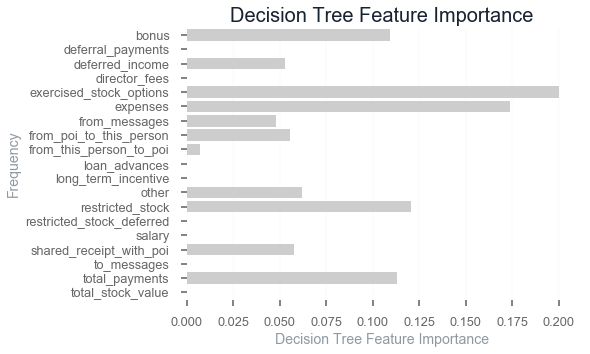

In [67]:
from sklearn.tree import DecisionTreeClassifier

clf_1 = DecisionTreeClassifier()

clf_1.fit(features, labels)

feat_weight = clf_1.feature_importances_

Feature_List2 = list(features_l)
print(feat_weight.shape)
print(len(Feature_List2))
df_F_L = pd.DataFrame(Feature_List2)
df_F_L["Feature_importance"] = feat_weight

plt1 = figures.bar(x_v="Feature_importance", 
            name="Decision Tree Feature Importance", 
            variable=0, data=df_F_L, ax_size=(7, 5))

(19,)
19


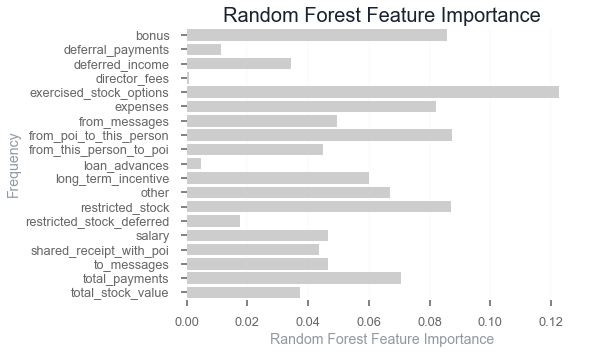

In [68]:
from sklearn.ensemble import RandomForestClassifier

clf_2 = RandomForestClassifier()

clf_2.fit(features, labels)

feat_weight = clf_2.feature_importances_

Feature_List2 = list(features_l)
print(feat_weight.shape)
print(len(Feature_List2))
df_F_L = pd.DataFrame(Feature_List2)
df_F_L["Feature_importance"] = feat_weight

plt2 = figures.bar(x_v="Feature_importance", 
            name="Random Forest Feature Importance", 
            variable=0, data=df_F_L, ax_size=(7, 5))

(19,)
19


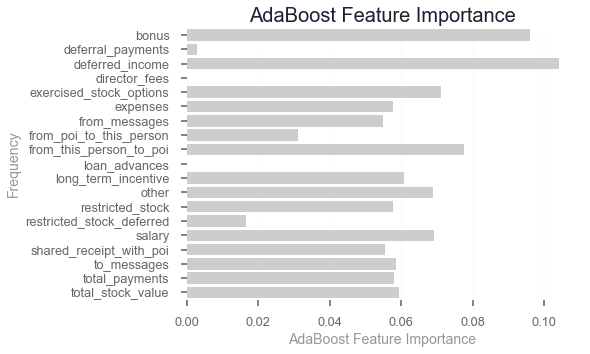

In [69]:
from sklearn.ensemble import AdaBoostClassifier

clf_3 = RandomForestClassifier()

clf_3.fit(features, labels)

feat_weight = clf_3.feature_importances_

Feature_List2 = list(features_l)
print(feat_weight.shape)
print(len(Feature_List2))
df_F_L = pd.DataFrame(Feature_List2)
df_F_L["Feature_importance"] = feat_weight

plt3 = figures.bar(x_v="Feature_importance", 
            name="AdaBoost Feature Importance", 
            variable=0, data=df_F_L, ax_size=(7, 5))

(19,)
19


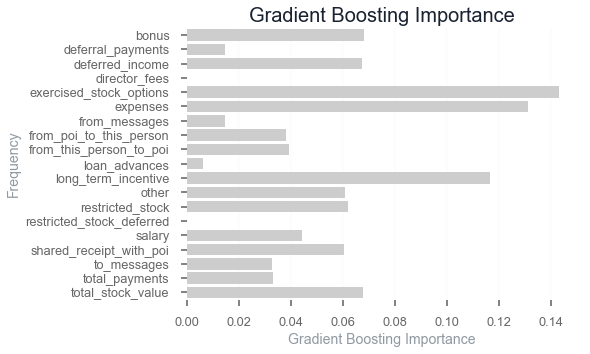

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

clf_3 = RandomForestClassifier()

clf_3.fit(features, labels)

feat_weight = clf_3.feature_importances_

Feature_List2 = list(features_l)
print(feat_weight.shape)
print(len(Feature_List2))
df_F_L = pd.DataFrame(Feature_List2)
df_F_L["Feature_importance"] = feat_weight

plt4 =figures.bar(x_v="Feature_importance", 
            name="Gradient Boosting Importance", 
            variable=0, data=df_F_L, ax_size=(7, 5))

In [79]:
df["ratio_to_poi"] = df["from_this_person_to_poi"]/df["from_messages"]
df["ratio_from_poi"] = df["from_poi_to_this_person"]/df["to_messages"]

In [80]:
df.iloc[[2]]

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value,name,ratio_to_poi,ratio_from_poi
BANNANTINE JAMES M,NaN,NaN,-5104.0,NaN,james.bannantine@enron.com,4046157.0,56301.0,29.0,39.0,0.0,...,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0,BANNANTINE JAMES M,0.0,0.068905
